# Intrusion Detection System

An intrusion detection system is a device or software application that monitors a network or systems for malicious activity or policy violations. Any intrusion activity or violation is typically reported either to an administrator or collected centrally using a security information and event management system.

https://en.wikipedia.org/wiki/Intrusion_detection_system

* https://www.educative.io/answers/what-is-the-sklearndatasetsfetchkddcup99-method-in-python
* https://notebook.community/whiterd/Tutorial-Notebooks/2018-06-24-sklearn-KDDCUP99
* https://www.codespeedy.com/network-intrusion-detection-system-using-machine-learning/

In [ ]:
# get data
import matplotlib.pyplot as plt
import pandas as pd

url= 'http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz' # owner of this dataset needs to give permission for access in order to run
df= pd.read_csv(url, header=None)
df.columns = [ 'duration','protocol_type', 'service', 'flag', 'src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in',
'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
'is_host_login', 'is_guest_login','cnt','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate',
'diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome']

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [ ]:
df['outcome'].unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [ ]:
df=df.replace(to_replace =["ipsweep.","portsweep.","nmap.","satan."],  value ="probe")
df=df.replace(to_replace =["ftp_write.", "guess_passwd.","imap.","multihop.","phf.","spy.", "warezclient.","warezmaster."],  value ="r2l")
df=df.replace(to_replace =["buffer_overflow.","loadmodule.","perl.", "rootkit."],  value ="u2r")
df=df.replace(to_replace =["back.", "land.","neptune.", "pod.","smurf.","teardrop."],value ="dos")

In [ ]:
from collections import Counter

N = 390000
df = df.drop(df[df['outcome'].eq('dos')].sample(N).index)
Counter(df['outcome'])

Counter({'normal.': 97278, 'u2r': 52, 'dos': 1458, 'r2l': 1126, 'probe': 4107})

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['protocol_type']= label_encoder.fit_transform(df['protocol_type'])
df['service']= label_encoder.fit_transform(df['service'])
df['flag']= label_encoder.fit_transform(df['flag'])
df['flag']= label_encoder.fit_transform(df['flag'])
df['outcome']= label_encoder.fit_transform(df['outcome'])

In [ ]:
from collections import Counter

Counter(df['outcome'])

Counter({1: 97278, 4: 52, 0: 1458, 3: 1126, 2: 4107})

### Categories of Attacks

* 0 - DOS: Denial of Service
* 1 - Normal
* 2 - probing (Brute-force probing attacks)
* 3 - R2L (Unauthorized accesses from remote servers)
* 4 - U2R (Privilege escalation attempts): Exploitation of vulnerabilities such as software bugs, misconfigurations, and incorrect access controls

https://kdd.ics.uci.edu/databases/kddcup99/task.html

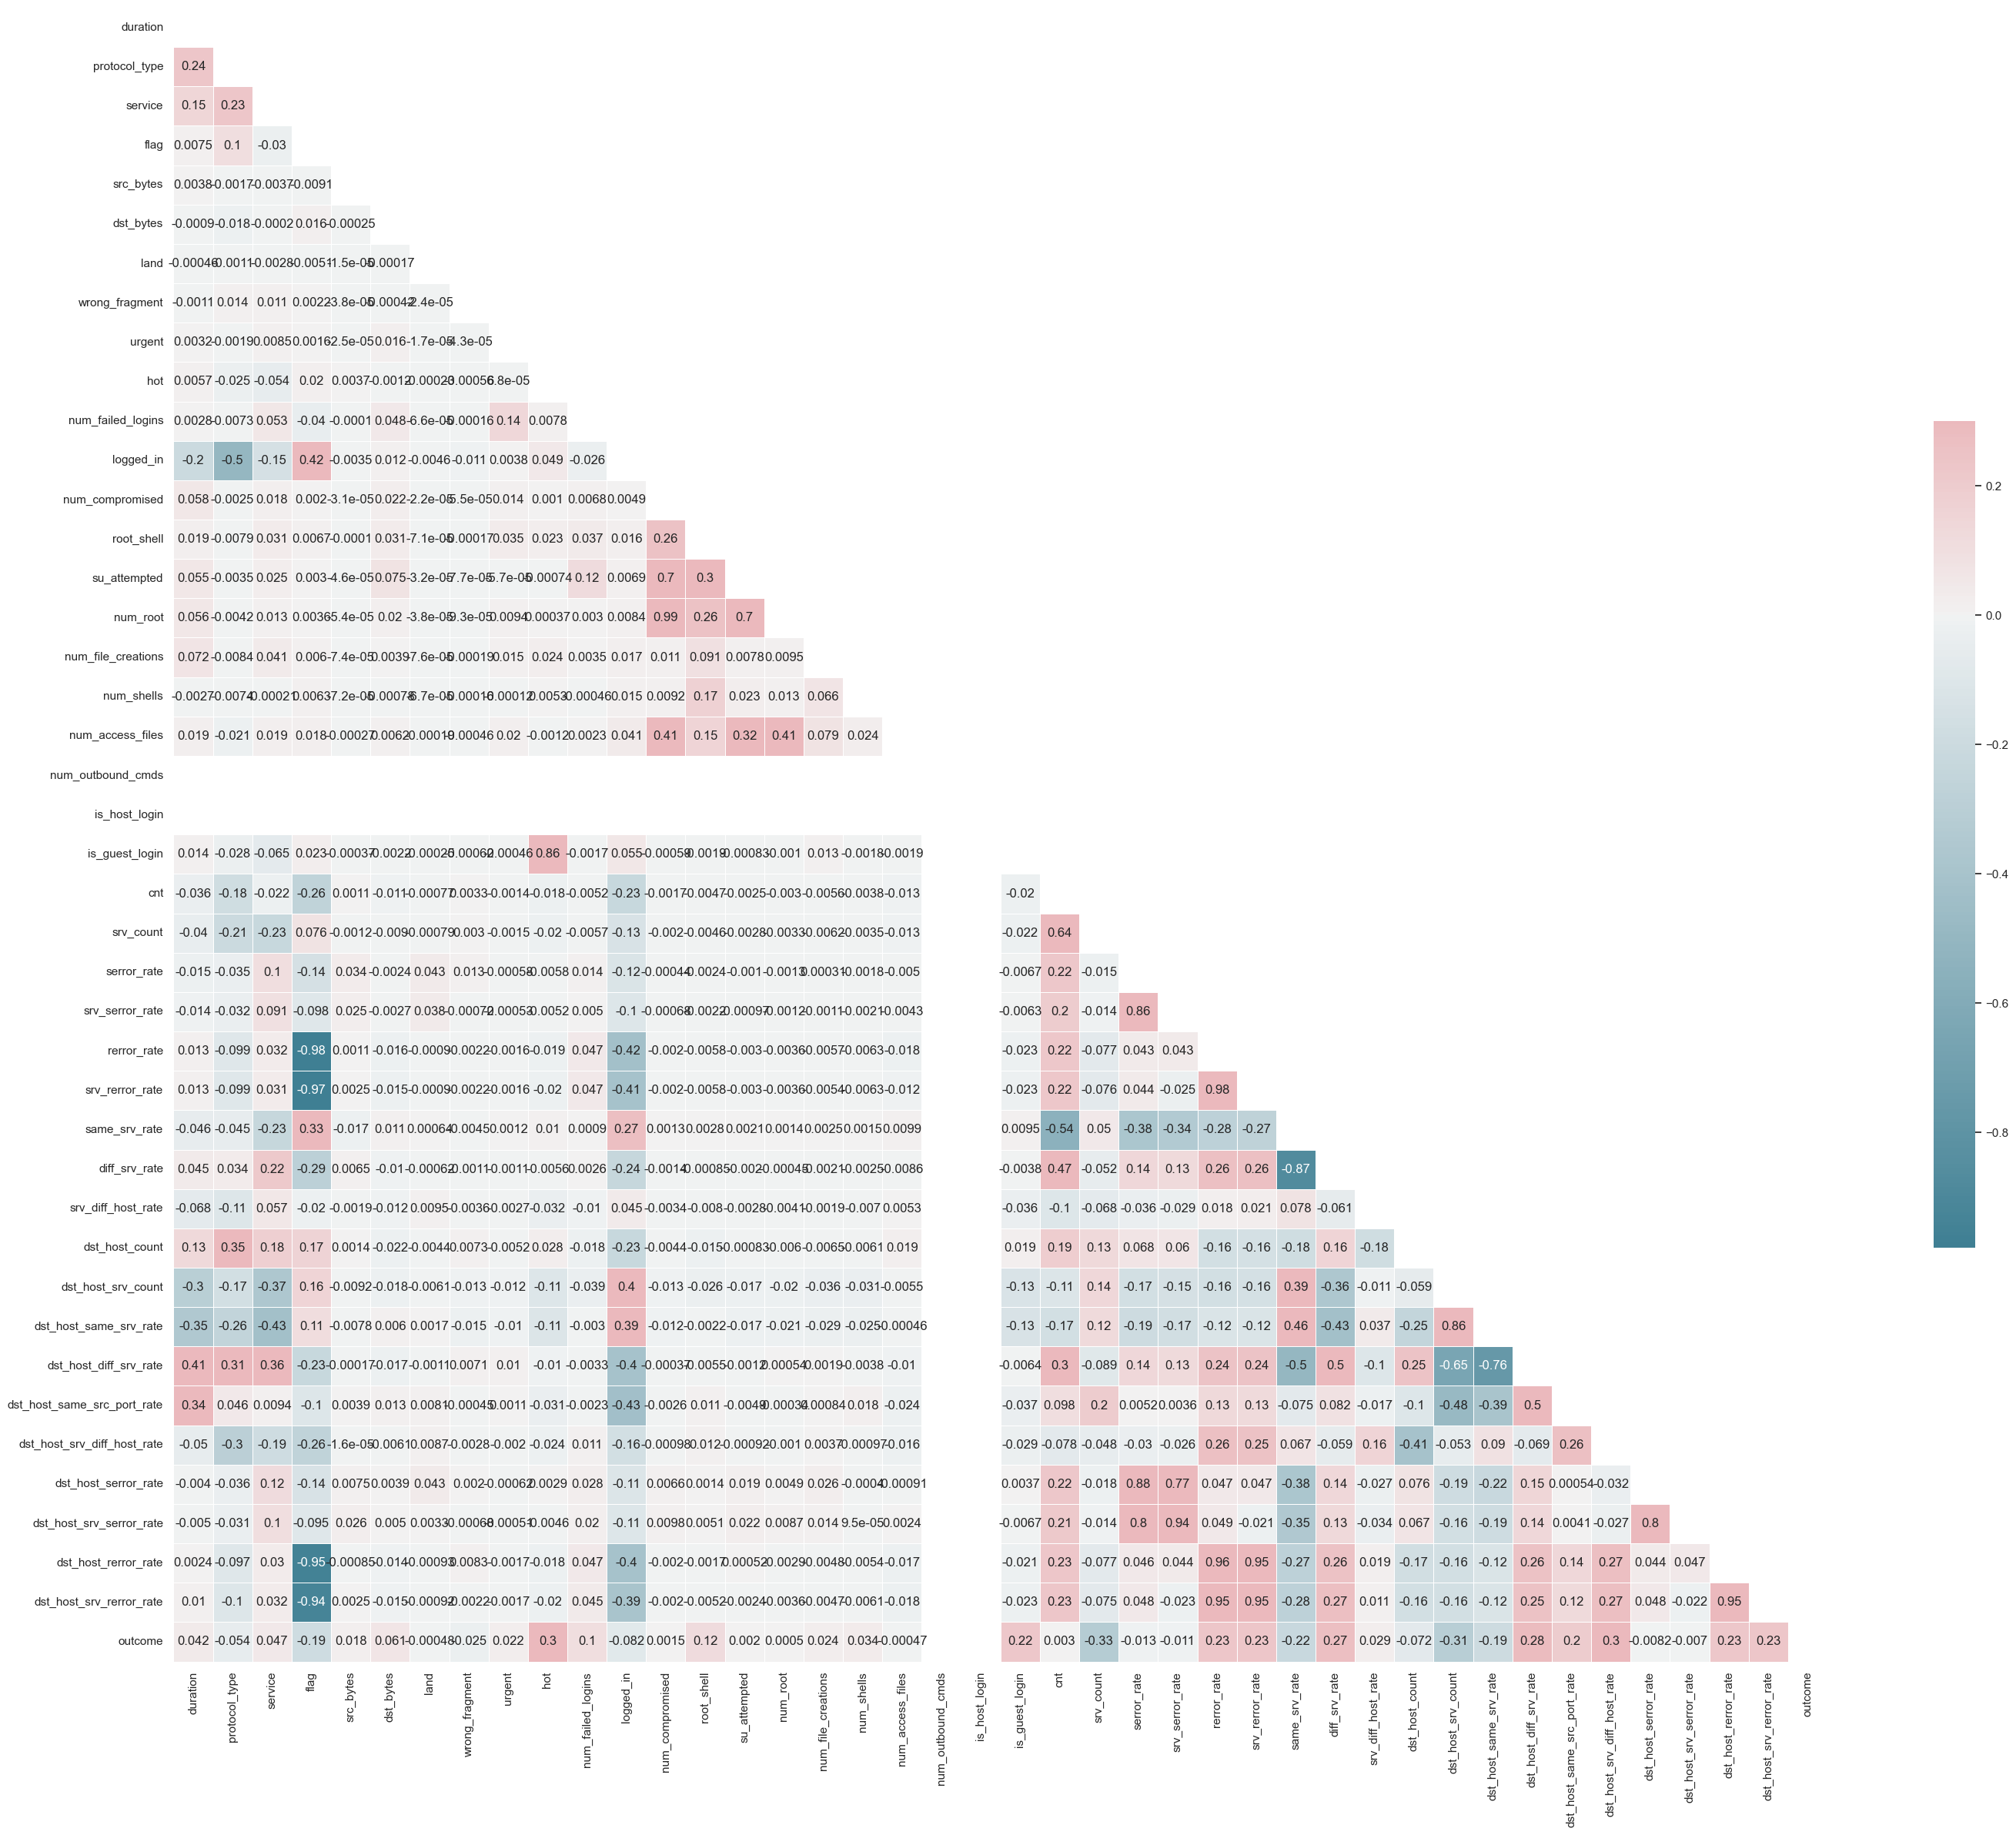

In [ ]:
# correlation heat map
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# correlation matrix
sns.set(style="white")

# calculate feature correlations
corr = df.corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f = plt.figure(figsize=(30, 24))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

plt.tight_layout()

In [ ]:
print('{:>30} {:>30} {:>30}'.format(*["Feature 1","Feature 2","Correlation"]))
x=[]
for i in corr:
    for j in corr:
        if((corr[i][j]>0.97) and i!=j and (i not in x)):
            l=len(i)+len(j)
            print('{:>30} {:>30} {:>30}'.format(*[i,j,corr[i][j]]))
            x.append(i)

                     Feature 1                      Feature 2                    Correlation
               num_compromised                       num_root             0.9944988952789768
                      num_root                num_compromised             0.9944988952789768
                   rerror_rate                srv_rerror_rate              0.983261238188926
               srv_rerror_rate                    rerror_rate              0.983261238188926


In [ ]:
for i in x:
    if(i in df.columns):
        df.drop(i,axis=1,inplace=True)

In [ ]:
df.drop('is_host_login',axis = 1, inplace=True)
df.drop('num_outbound_cmds',axis = 1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104021 entries, 0 to 494020
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     104021 non-null  int64  
 1   protocol_type                104021 non-null  int32  
 2   service                      104021 non-null  int32  
 3   flag                         104021 non-null  int64  
 4   src_bytes                    104021 non-null  int64  
 5   dst_bytes                    104021 non-null  int64  
 6   land                         104021 non-null  int64  
 7   wrong_fragment               104021 non-null  int64  
 8   urgent                       104021 non-null  int64  
 9   hot                          104021 non-null  int64  
 10  num_failed_logins            104021 non-null  int64  
 11  logged_in                    104021 non-null  int64  
 12  root_shell                   104021 non-null  int64  
 13 

In [ ]:
X= df.drop(['outcome'], axis=1)
y=df['outcome']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42 )

In [ ]:
# from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_preds=model.predict(X_test)
print(confusion_matrix(y_test, y_preds))
print("Accuracy:",metrics.accuracy_score(y_test,y_preds))
print(metrics.classification_report(y_test,y_preds))

[[  274     0     1     0     0]
 [    0 19450     0     3     1]
 [    0     7   835     0     0]
 [    0     3     0   220     2]
 [    0     6     0     0     3]]
Accuracy: 0.9988944965152607
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       275
           1       1.00      1.00      1.00     19454
           2       1.00      0.99      1.00       842
           3       0.99      0.98      0.98       225
           4       0.50      0.33      0.40         9

    accuracy                           1.00     20805
   macro avg       0.90      0.86      0.88     20805
weighted avg       1.00      1.00      1.00     20805

